In [19]:
import pandas as pd
from pprint import pprint
import pystan
from scipy.special import expit
from matplotlib import pyplot as plt
from numpy.random import normal, randint, binomial, choice
from numpy import percentile, concatenate, array, linspace, append
%matplotlib inline

Text(0.5, 1.0, 'The logistic function')

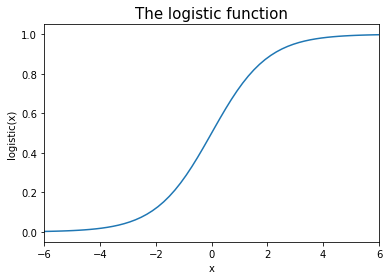

In [4]:
x_axis = linspace(-10, 10, 100)
plt.plot(x_axis, expit(x_axis))
plt.xlabel('x')
plt.xlim([-6, 6])
plt.ylabel('logistic(x)')
plt.title('The logistic function', fontsize=15)

In [8]:
def generate_binary_irt_data(sim_input):
    sim_ability = normal(loc=0,
                         scale=sim_input['sigma_ability'],
                         size=sim_input['S'])
    sim_difficulty = normal(loc=sim_input['mu_difficulty'],
                            scale=sim_input['sigma_difficulty'],
                            size=sim_input['I'])
    sim_subject = randint(low=0,
                          high=sim_input['S'],
                          size=sim_input['R'])
    sim_item = randint(low=0,
                       high=sim_input['I'],
                       size=sim_input['R'])
    sim_success_probabilities = expit(sim_ability[sim_subject] -
                                      sim_difficulty[sim_item])
    sim_grade = binomial(n=1,
                         p=sim_success_probabilities,
                         size=sim_input['R'])
    sim_data = {
        'grade': sim_grade,
        'subject': sim_subject + 1,
        'item': sim_item + 1,
    }
    sim_data.update({i: binary_sim_input[i] for i in ['R', 'I', 'S']})
    recoverables = {
        'ability': sim_ability,
        'difficulty': sim_difficulty,
    }
    recoverables.update({i: binary_sim_input[i] for i in ['sigma_ability',
                                                          'mu_difficulty',
                                                          'sigma_difficulty']})
    return sim_data, recoverables

binary_sim_input = {'R': 10000,
                    'I': 15,
                    'S': 15,
                    'sigma_ability': 1,
                    'sigma_difficulty': 2,
                    'mu_difficulty': -1}
binary_sim_data, binary_sim_recoverables = generate_binary_irt_data(binary_sim_input)
print('Here is our randomly generated data:')
pprint(binary_sim_data) 

Here is our randomly generated data:
{'I': 15,
 'R': 10000,
 'S': 15,
 'grade': array([1, 1, 1, ..., 1, 1, 0]),
 'item': array([ 8, 12,  2, ...,  3,  3, 13]),
 'subject': array([14, 14, 14, ...,  3,  9, 11])}
